In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

import ssl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import *

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

# Задание № 1

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
len(data)

583

In [5]:
len(data[data['Dataset'] == 1]) #Пациент с болезнью печени

416

In [6]:
len(data[data['Dataset'] == 2]) #Пациент здоров

167

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin

In [7]:
db = data['Direct_Bilirubin']
tb = data['Total_Bilirubin'] 
data['Direct_Bilirubin'].fillna(0, inplace = True)
data['Total_Bilirubin'].fillna(0, inplace = True)

In [8]:
pearsonr(db, tb)

(0.8746179301164134, 7.873553178023721e-185)

In [9]:
data[['Direct_Bilirubin', 'Total_Bilirubin']].cov() #Ковариация

,Direct_Bilirubin,Total_Bilirubin
Direct_Bilirubin,7.887659,15.252836
Total_Bilirubin,15.252836,38.558160


In [10]:
15.252836/(statistics.pstdev(db)*statistics.pstdev(tb)) #Корреляция

0.8761207374582995

Коэффициент корреляции Пирсона = 0.876 или 87,6 %.

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [11]:
model = LinearRegression()

db1 = np.array(db).reshape(-1,1)
tb1 = np.array(tb).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    db1,
    tb1,
    test_size = 0.2
)

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

39.641929833194546
0.8829013481667054


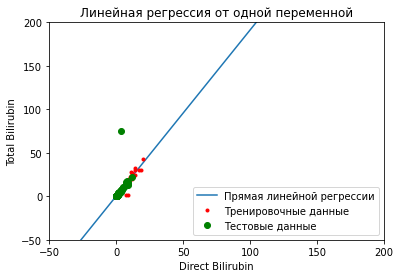

In [12]:
plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.title('Линейная регрессия от одной переменной')

x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)

plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Посчитать квантили 10%, 25%, 50%, 75% для Age, Direct_Bilirubin и Total_Bilirubin

In [13]:
df = data[['Age','Direct_Bilirubin', 'Total_Bilirubin']]
df.quantile([0.1, 0.25, 0.5, 0.75], axis = 0) 

,Age,Direct_Bilirubin,Total_Bilirubin
0.10,23.0,0.1,0.7
0.25,33.0,0.2,0.8
0.50,45.0,0.3,1.0
0.75,58.0,1.3,2.6


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квантиль 0.5 в данных выборках. Чем они отличаются?

In [14]:
less50=db[data['Age']<50]
less50.head()

5     0.7
6     0.2
7     0.3
8     0.3
15    0.1
Name: Direct_Bilirubin, dtype: float64

Text(0.5, 0, 'Direct Bilirubin')

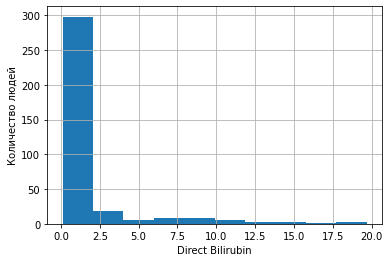

In [15]:
df=less50.hist()
df.set_ylabel('Количество людей')
df.set_xlabel('Direct Bilirubin')

In [16]:
more50=db[data['Age']>=50]
more50.head()

0    0.1
1    5.5
2    4.1
3    0.4
4    2.0
Name: Direct_Bilirubin, dtype: float64

Text(0.5, 0, 'Direct Bilirubin')

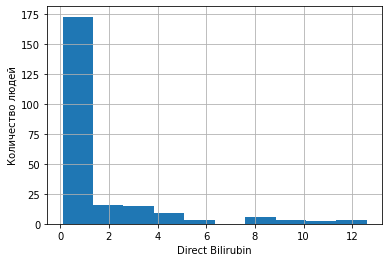

In [17]:
df=more50.hist()
df.set_ylabel('Количество людей')
df.set_xlabel('Direct Bilirubin')

In [18]:
print("Q1 квантиль 50 % less50: ", less50.quantile([0.5]))
print("Q2 квантиль 50 % more50: ", more50.quantile([0.5]))

print("Среднее значение less50: ", less50.mean(axis=0))
print("Среднее значение more50: ", more50.mean(axis=0))

Q1 квантиль 50 % less50:  0.5    0.3
Name: Direct_Bilirubin, dtype: float64
Q2 квантиль 50 % more50:  0.5    0.4
Name: Direct_Bilirubin, dtype: float64
Среднее значение less50:  1.4946175637393755
Среднее значение more50:  1.4730434782608677


+ Среднее значение — среднеарифметическое значение выборки. Это сумма данных чисел, деленное на их количество.
+ Квантиль — значение, которое заданная случайная величина не превышает с фиксированной вероятностью (в данном случае 50 %)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?
Посчитать одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. 
+ Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? 
+ Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [19]:
sick = tb[data['Dataset'] == 1] #Пациент с болезнью печени
healthy = tb[data['Dataset'] == 2] #Пациент зборов
print('t-критерий у больных людей: \n\t', ttest_1samp(sick, 0))
print('t-критерий у здоровых людей: \n\t', ttest_1samp(healthy, 0))

t-критерий у больных людей: 
	 Ttest_1sampResult(statistic=11.888020517106993, pvalue=2.995697191414789e-28)
t-критерий у здоровых людей: 
	 Ttest_1sampResult(statistic=14.698808917873793, pvalue=7.337914669049984e-32)


Генеральная совокупность - все данные. Выборка - часть данных из генеральной совокупности. 
По высокому показателю значимости можно понять, что рассматривается выборка, а не генеральная совокупность

+ для больных
            alfa = 0.05      P = 0.95      n = 416      t = 415      x = 1.97
                    1.97 < 11.89 => отвергаем нулевую гипотезу о сходстве

+ для здоровых
            alfa = 0.05      P = 0.95      n = 167      t = 166      x = 1.97
                    1.97 < 14.69 => отвергаем нулевую гипотезу о сходстве

# Задание № 2

1) Загрузить файл auto.csv

In [20]:
url="auto.csv"
data=pd.read_csv(url)
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,158,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,192,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,23875


2) Рассчитать основные статистики для переменных

In [21]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [22]:
data.mode().head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0


3) Рассчитать и визуализировать корреляционную матрицу для переменных

In [23]:
data.columns.tolist()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [24]:
X = data[data.columns.tolist()]

In [25]:
#1 способ
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


In [26]:
#2 способ
np.round_(X.corr(), decimals=2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


4) Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis, что можно сказать о типе распределения?

In [27]:
print('skewness: ', data['price'].skew())
print('kurtosis: ', data['price'].kurtosis())

skewness:  1.7663998888191028
kurtosis:  2.948637293212561


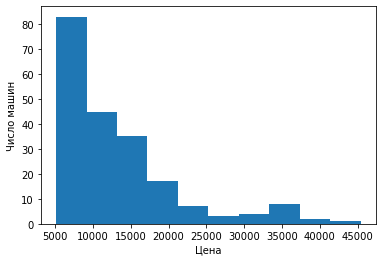

In [28]:
plt.hist(data['price'])
plt.xlabel('Цена')
plt.ylabel('Число машин')
plt.show()

Судя по графику, можно предположить, что это экспоненциальное распределение
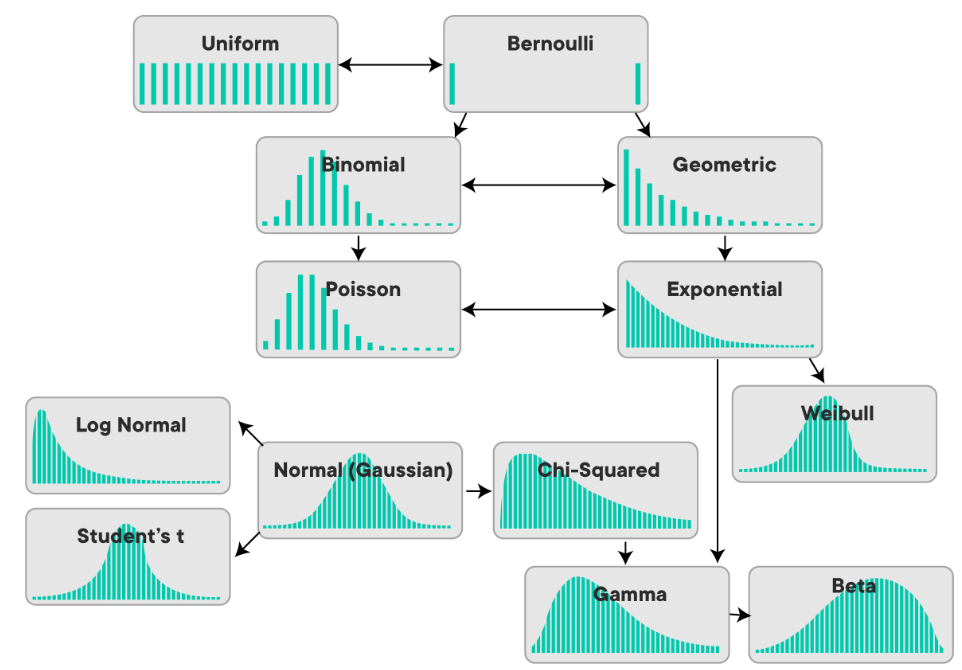

5) Визуализировать несколько взаимосвязей между переменными

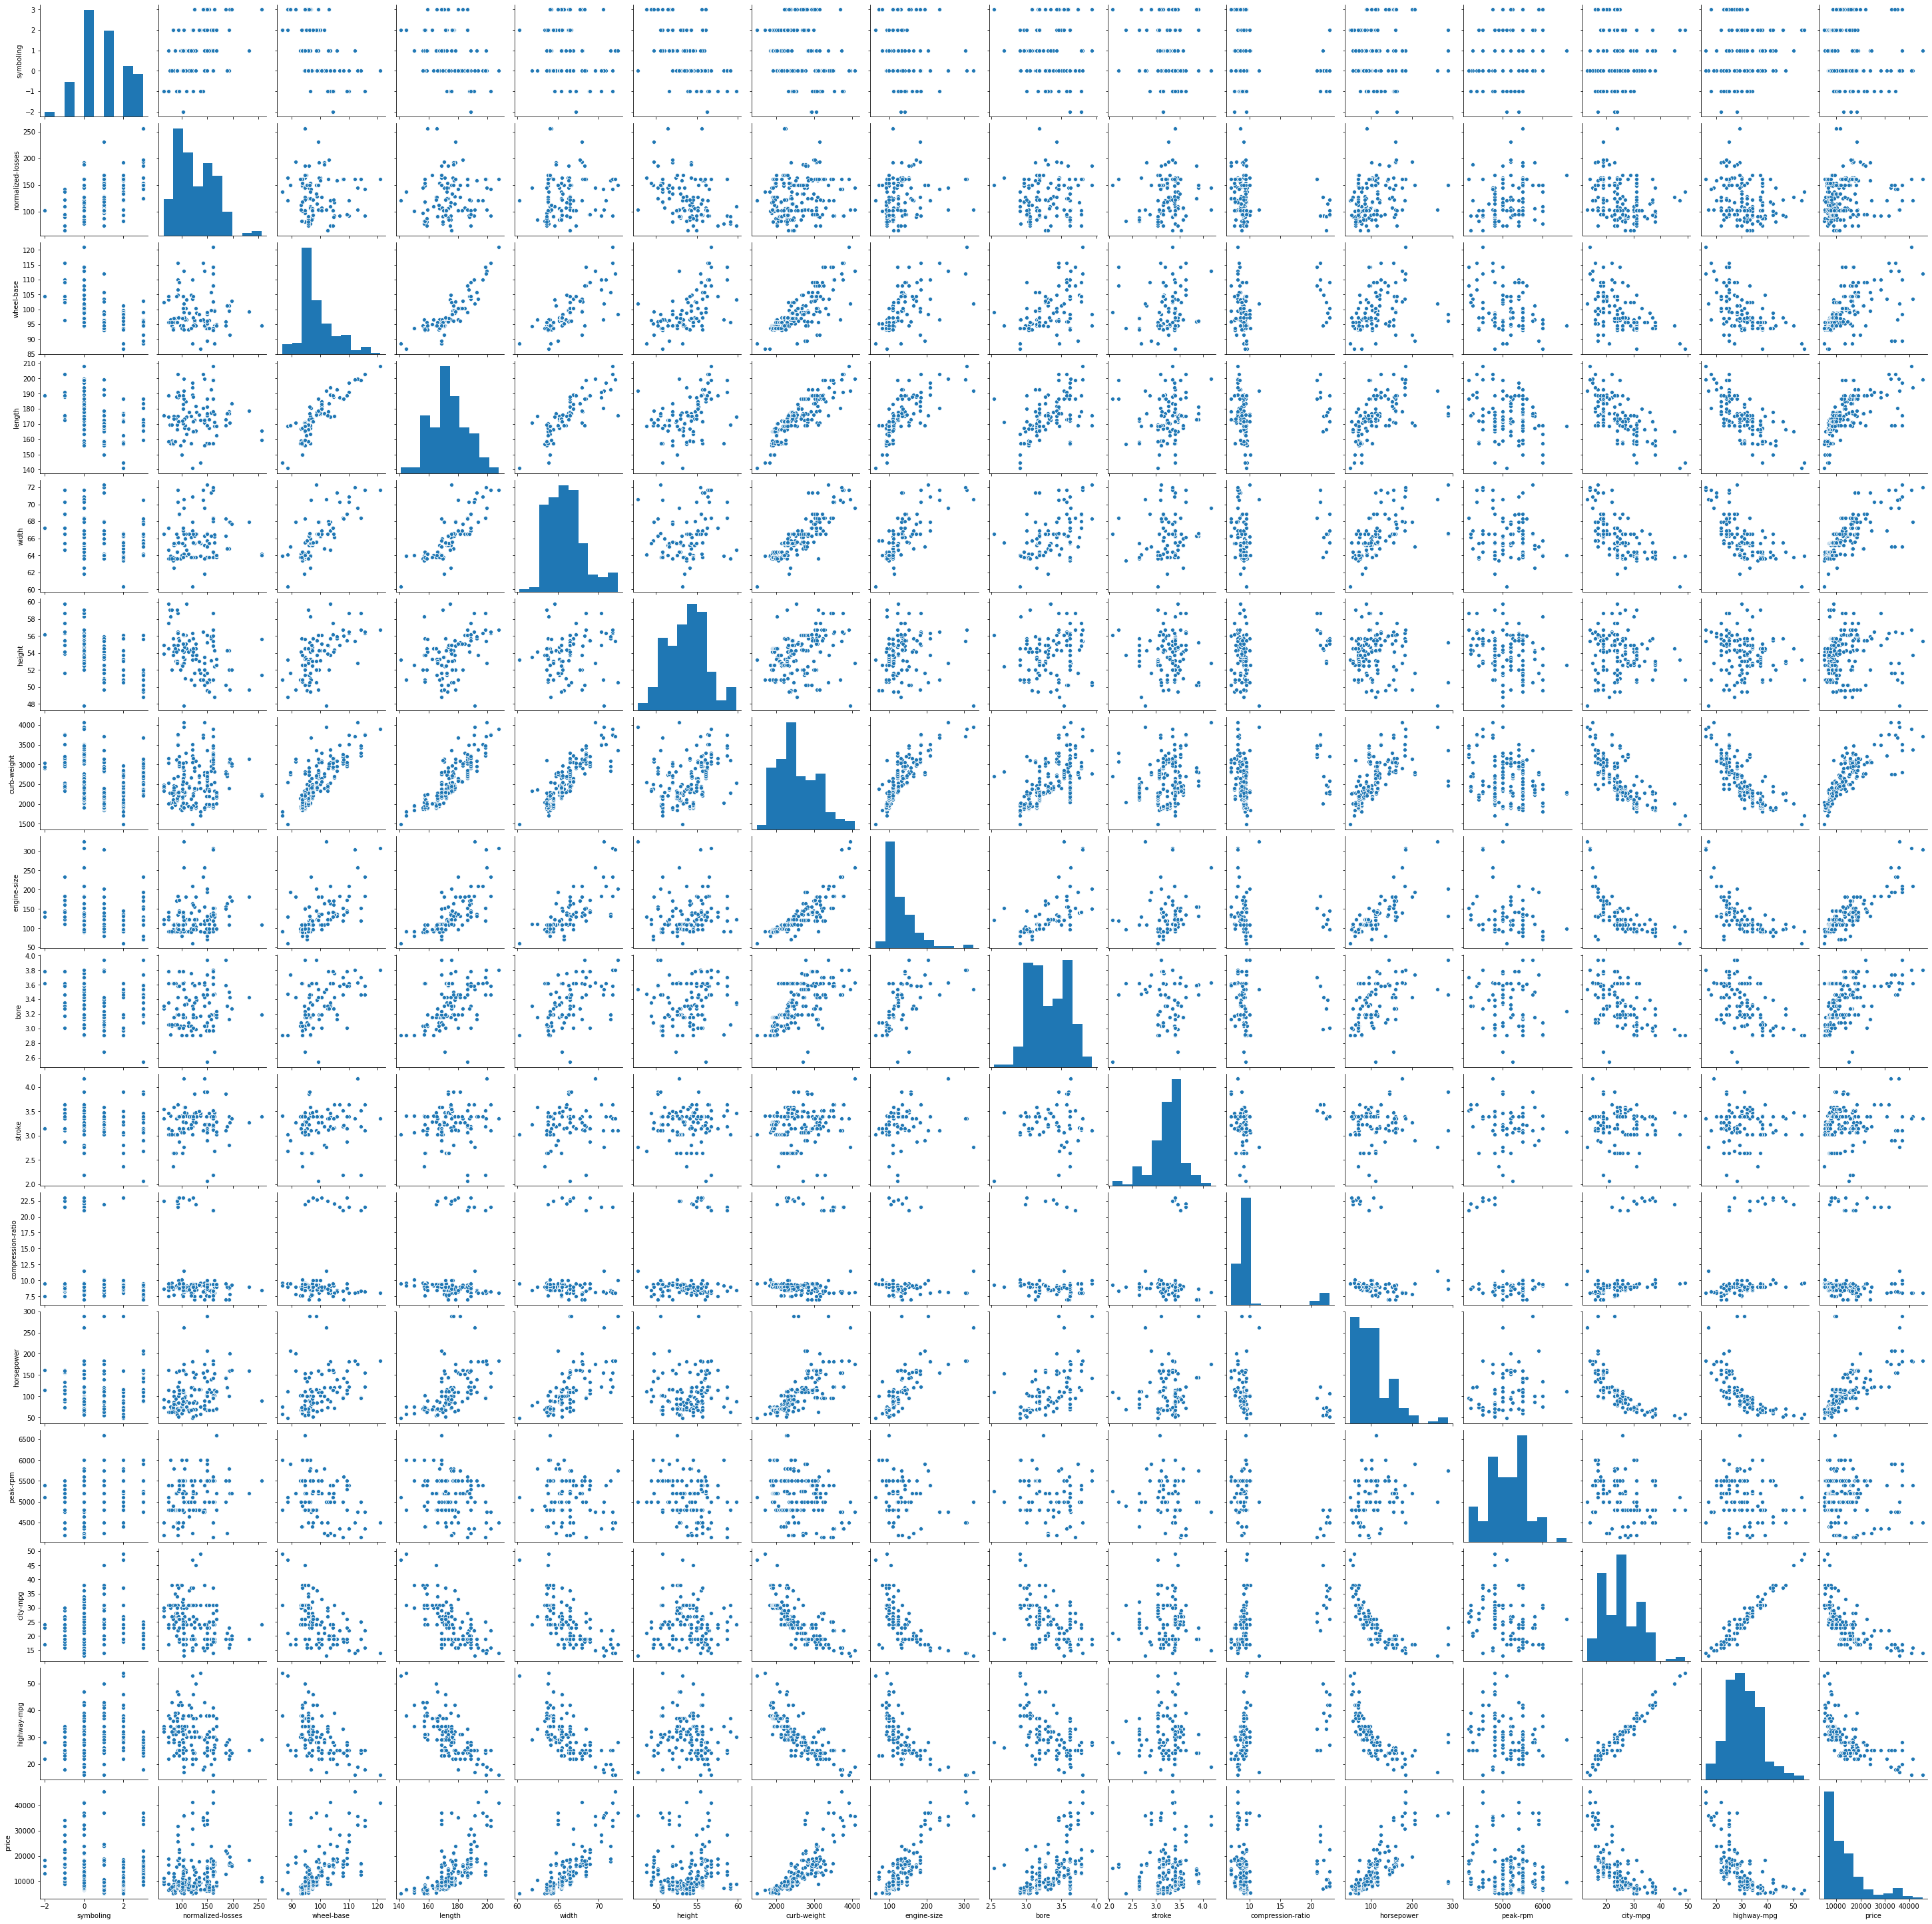

In [35]:
data.make.unique()
sns.pairplot(data)#, hue = 'make')

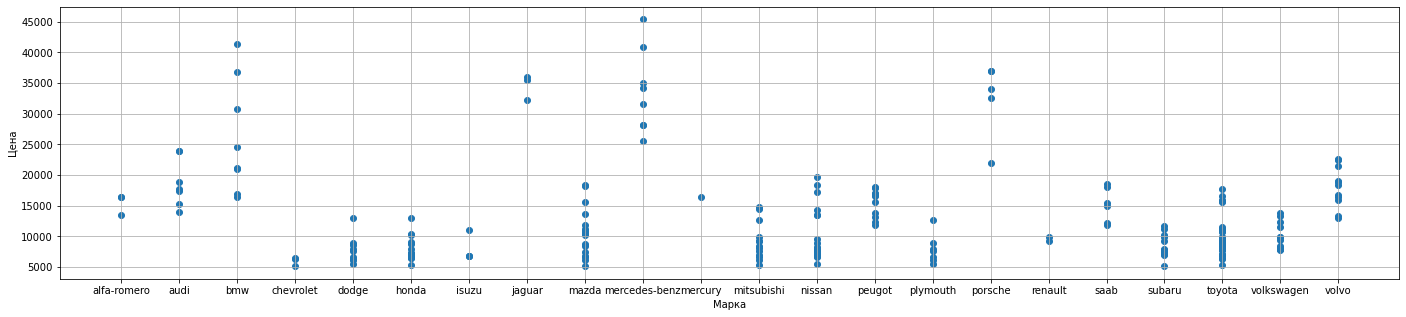

In [34]:
y = data['price']
x = data['make']
fig, ax = plt.subplots(figsize=(24,5))
ax.scatter(x, y)
ax.grid(True)
plt.ylabel('Цена')
plt.xlabel('Марка')
plt.show()

6) Выдвинуть несколько гипотез (2-3) по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

+ Чем машина больше по массе (тяжелее), тем она дороже

Гипотеза подтвердилась: более массивные машины стоят в дороже

In [50]:
y = data['price']
x1 = y[data['curb-weight'] <= data['curb-weight'].mean()]
x2 = y[data['curb-weight'] > data['curb-weight'].mean()]

print('t-критерий x1: ', ttest_1samp(x1, 0))
print('t-критерий x2: ', ttest_1samp(x2, 0))

t-критерий x1:  Ttest_1sampResult(statistic=38.77233275259642, pvalue=1.011311093662041e-69)
t-критерий x2:  Ttest_1sampResult(statistic=21.641353369669247, pvalue=7.049929992459681e-36)


+ Общий вес автомобиля зависит от размера двигателя

Гипотеза подтвердилась: в среднем общая масса автомобиля зависит от размеров двигателя

In [48]:
y = data['curb-weight']
x1 = y[data['engine-size'] <= data['engine-size'].mean()]
x2 = y[data['engine-size'] > data['engine-size'].mean()]

print('t-критерий x1: ', ttest_1samp(x1, 0))
print('t-критерий x2: ', ttest_1samp(x2, 0))

t-критерий x1:  Ttest_1sampResult(statistic=82.35673969030981, pvalue=2.137551400174117e-113)
t-критерий x2:  Ttest_1sampResult(statistic=68.81268007998577, pvalue=7.835450503479835e-69)


+ Чем больше у машины лошадиных сил, тем она дороже

Гипотеза подтвердилась: машины с большей лошадиной силой стоят в дороже

In [47]:
y = data['price']
x1 = y[data['horsepower'] <= data['horsepower'].mean()]
x2 = y[data['horsepower'] > data['horsepower'].mean()]

print('t-критерий x1: ', ttest_1samp(x1, 0))
print('t-критерий x2: ', ttest_1samp(x2, 0))

t-критерий x1:  Ttest_1sampResult(statistic=30.904622072959857, pvalue=1.5274477344805865e-59)
t-критерий x2:  Ttest_1sampResult(statistic=19.675230294803278, pvalue=1.3517665674242836e-32)
